In [1]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from IPython.display import Audio
%matplotlib inline
sns.set_style("ticks")

In [2]:
def plot_stft(sig):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(sig)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear');

In [3]:
def plot_mel_specgtrogram(y):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',
                             y_axis='mel', sr=sr);



In [4]:
def plot_dft(sig, win_len=1024):
    window = np.hamming(win_len)
    sig = window * sig[:win_len]
    D = np.abs(np.fft.fft(sig))[:win_len//2]
    xs = np.arange(win_len/2) * (22050/win_len)
    plt.plot(xs, D)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score

In [6]:
def extract_mfccs(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return np.concatenate([
        mfccs.mean(axis=1),
        mfccs.std(axis=1)
    ])

def extract_chroma(y, sr):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return np.concatenate([
        chroma.mean(axis=1),
        chroma.std(axis=1)
    ])

def extract_feats(y, sr):
    chroma = extract_chroma(y, sr)
    mfccs = extract_mfccs(y, sr)
    feats = np.concatenate([chroma, mfccs])
    
    labels = []   
    for i in range(len(chroma) // 2):
        labels.append('chroma_{}_mean'.format(i))
    for i in range(len(chroma) // 2):
        labels.append('chroma_{}_std'.format(i))
    for i in range(len(mfccs) // 2):
        labels.append('mfcc_{}_mean'.format(i))
    for i in range(len(mfccs) // 2):
        labels.append('mfcc_{}_std'.format(i))
        
    return feats, labels

def feats_for_fname(fname):
    y, sr = librosa.core.load(fname)
    return extract_feats(y, sr)

def fname_generator(genre):
    #for root, dirs, files in os.walk('/media/bita/Elements/Ironhack-Final/genres'):
    for root, dirs, files in os.walk('/media/bita/Elements/Ironhack-Final/Audios/genres'):    
        for file in files:
            if file.endswith('.wav') and genre in file:
                yield os.path.join(root, file)         
                
def df_for_genre(genre):
    fnames = []
    feats = []
    for fname in fname_generator(genre):
        # print("extracting feats for {}".format(fname))
        cur_feats, labels = feats_for_fname(fname)
        fnames.append(fname)
        feats.append(cur_feats)
    df = pd.DataFrame(feats, columns=labels, index=fnames)
    df['label'] = genre
    return df

In [7]:
#data = pd.concat([df_for_genre(genre) for genre in ['pop', 'classical']])
#data = pd.concat([df_for_genre(genre) for genre in ['Meow', 'Bark']])
data = pd.concat([df_for_genre(genre) for genre in ['Drawer', 'Tearing']])

/home/bita/anaconda3/envs/backpack1/lib/python3.7/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [8]:
data

,chroma_0_mean,chroma_1_mean,chroma_2_mean,chroma_3_mean,chroma_4_mean,chroma_5_mean,chroma_6_mean,chroma_7_mean,chroma_8_mean,chroma_9_mean,...,mfcc_11_std,mfcc_12_std,mfcc_13_std,mfcc_14_std,mfcc_15_std,mfcc_16_std,mfcc_17_std,mfcc_18_std,mfcc_19_std,label
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.07563fea.wav,0.690897,0.705224,0.786292,0.726599,0.637643,0.503144,0.478135,0.647134,0.645020,0.674536,...,6.798239,4.195461,4.493414,4.590219,5.194151,5.264136,3.108226,4.212099,5.248171,Drawer
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.09bc3033.wav,0.657454,0.690169,0.617083,0.586827,0.614259,0.584877,0.587270,0.606239,0.615080,0.603689,...,5.885297,5.632775,5.734721,6.121374,4.735601,4.645299,4.374134,4.107952,4.443729,Drawer
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.0d2047b5.wav,0.745149,0.736373,0.801126,0.854418,0.726190,0.656828,0.596201,0.682411,0.621716,0.645721,...,5.782737,5.323351,5.778591,4.789298,4.932345,3.897828,4.669988,4.418905,4.856446,Drawer
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.0d74110a.wav,0.636505,0.583500,0.566000,0.496009,0.411137,0.402404,0.362823,0.415558,0.534826,0.523614,...,5.170397,5.338244,5.483082,5.002855,4.951660,7.945237,7.371131,4.869849,4.402843,Drawer
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.0e451691.wav,0.571067,0.589900,0.650796,0.656497,0.674395,0.690545,0.675117,0.684272,0.786052,0.774085,...,4.703491,4.467715,3.973963,4.587643,4.535502,4.214790,4.704339,4.823587,4.779665,Drawer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.b03249fe.wav,0.670996,0.686442,0.683290,0.654669,0.713935,0.632880,0.534319,0.628848,0.635586,0.594484,...,5.328805,4.889686,4.681561,4.798028,6.199586,4.494982,5.258642,4.142303,3.388592,Tearing
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.b1085f23.wav,0.667518,0.700692,0.770039,0.737386,0.642307,0.624894,0.604483,0.574237,0.542171,0.522470,...,6.445723,5.907301,5.363050,5.434755,5.342513,4.781820,4.296310,5.091263,4.350602,Tearing
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.b1128ed8.wav,0.664042,0.652105,0.683612,0.675095,0.602491,0.621491,0.626262,0.604899,0.621772,0.604603,...,8.661904,8.942449,6.851598,6.489392,6.689340,6.606384,5.617705,6.958795,6.625757,Tearing
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.b1f1177a.wav,0.351679,0.363760,0.417067,0.430717,0.398372,0.414438,0.607901,0.902711,0.594604,0.352673,...,4.798403,5.118153,4.824335,5.253765,4.004653,4.445308,3.930141,4.091415,4.020982,Tearing


In [9]:
y = data['label']
X = data.drop('label', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=F

In [13]:
y_pred = pipeline.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.8985507246376812

In [15]:
y_test

/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.80e2a525.wav       Drawer
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.d53f97ee.wav       Drawer
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.ca5ea716.wav    Tearing
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.a23522e9.wav    Tearing
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.c303ae70.wav    Tearing
                                                                                   ...   
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.bc32a4ed.wav       Drawer
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.500c144a.wav    Tearing
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.761c61b6.wav       Drawer
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.6625eab7.wav    Tearing
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.ecf8eff4.wav       Drawer
Name: labe

In [16]:
y_pred

array(['Drawer', 'Drawer', 'Drawer', 'Tearing', 'Tearing', 'Tearing',
       'Tearing', 'Drawer', 'Drawer', 'Tearing', 'Drawer', 'Tearing',
       'Drawer', 'Tearing', 'Tearing', 'Tearing', 'Drawer', 'Tearing',
       'Drawer', 'Tearing', 'Tearing', 'Drawer', 'Tearing', 'Tearing',
       'Tearing', 'Tearing', 'Drawer', 'Tearing', 'Tearing', 'Tearing',
       'Drawer', 'Tearing', 'Tearing', 'Drawer', 'Drawer', 'Tearing',
       'Tearing', 'Tearing', 'Tearing', 'Tearing', 'Tearing', 'Tearing',
       'Tearing', 'Drawer', 'Tearing', 'Tearing', 'Tearing', 'Tearing',
       'Tearing', 'Drawer', 'Tearing', 'Drawer', 'Drawer', 'Tearing',
       'Tearing', 'Drawer', 'Tearing', 'Drawer', 'Tearing', 'Drawer',
       'Tearing', 'Tearing', 'Tearing', 'Tearing', 'Tearing', 'Drawer',
       'Drawer', 'Tearing', 'Tearing', 'Tearing', 'Drawer', 'Drawer',
       'Tearing', 'Tearing', 'Tearing', 'Drawer', 'Tearing', 'Tearing',
       'Drawer', 'Tearing', 'Tearing', 'Drawer', 'Tearing', 'Tearing',
      

In [17]:
y_pred != y_test


/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.80e2a525.wav      False
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.d53f97ee.wav      False
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.ca5ea716.wav     True
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.a23522e9.wav    False
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.c303ae70.wav    False
                                                                                  ...  
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.bc32a4ed.wav      False
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.500c144a.wav     True
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.761c61b6.wav      False
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.6625eab7.wav    False
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.ecf8eff4.wav      False
Name: label, Length: 138, dtype:

In [18]:
y_pred_test_wrong = (y_pred != y_test)
y_pred_test_right = (y_pred == y_test)

In [19]:
type(y_pred_test_wrong)

pandas.core.series.Series

In [20]:
df = y_pred_test_wrong.to_frame()

In [21]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

df


,label
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.80e2a525.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.d53f97ee.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.ca5ea716.wav,True
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.a23522e9.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.c303ae70.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.35950597.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.b1128ed8.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.fefcacd6.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.fc4463ef.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.4e260295.wav,False


In [22]:
# PlAY True/FALSE identifications
for t in df.index[0:1]:
    print(t)
    y, sr = librosa.core.load(t)
    
Audio(data=y, rate=sr)

/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.80e2a525.wav


In [23]:
df_wrong = y_pred_test_wrong.to_frame()
df_right = y_pred_test_right.to_frame()

In [26]:
# Tearing predicted as Drawer
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.3152ea60.wav')
Audio(data=y, rate=sr)

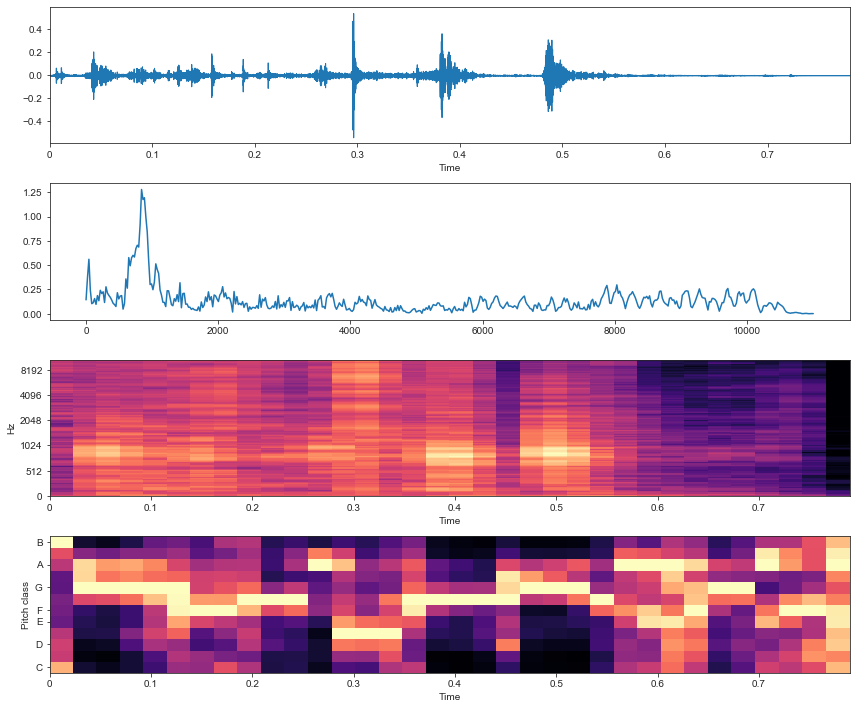

In [27]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [28]:
# Drawer detected as Tearing
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.0d2047b5.wav')
Audio(data=y, rate=sr)

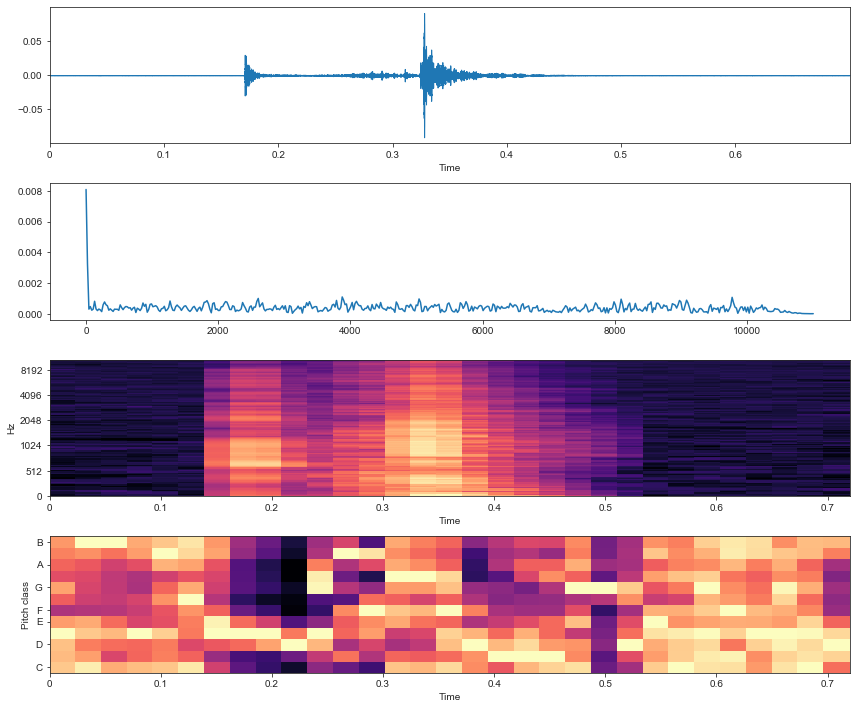

In [29]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [30]:
# Tearing detected as Tearing
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Tearing/Tearing.886f3b89.wav')
Audio(data=y, rate=sr)

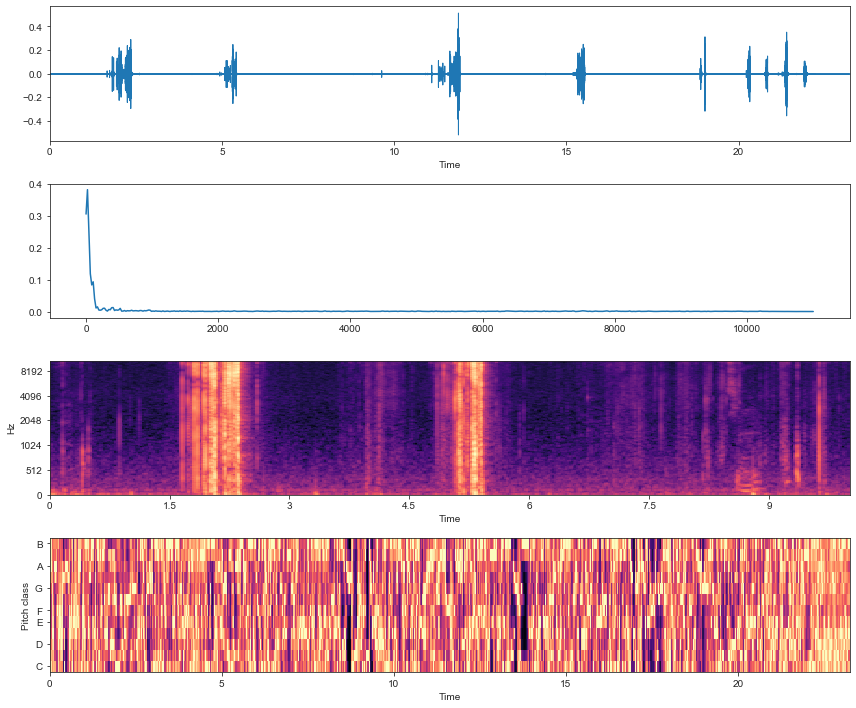

In [31]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [32]:
# Drawer detected as Drawer
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Drawer/Drawer.373763dc.wav')
Audio(data=y, rate=sr)

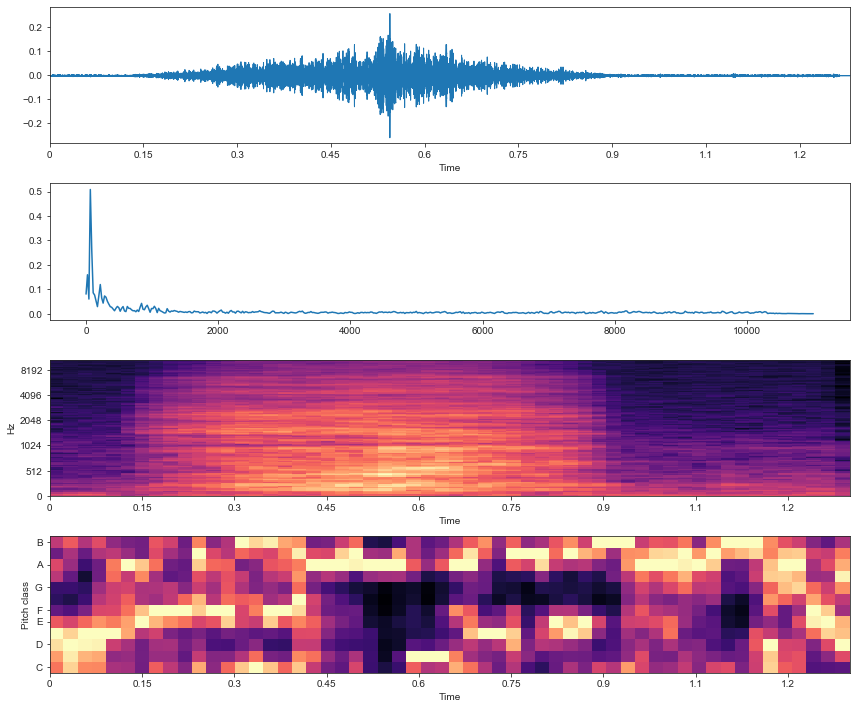

In [33]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()